# Data Cleaning

## Overview

This dataset contains transactional sales data from a café chain. It includes information on items sold, pricing, quantity, payment methods, and store locations. The data may contain inconsistencies, typos, and formatting issues, which require thorough cleaning for analysis or modeling.


It will require **thorough cleaning** due to potential inconsistencies in formatting, spelling, duplication, missing values, and incorrect data types.

---

### 2. Column Descriptions

| Column Name        | Description                                                                 |
| ------------------ | --------------------------------------------------------------------------- |
| `Transaction ID`   | Unique identifier for each sale transaction. Should be a string or integer. |
| `Item`             | Name of the product/item sold (e.g., "Latte", "Croissant").                 |
| `Quantity`         | Number of units of the item sold. Should be an integer.                     |
| `Price Per Unit`   | Price for a single unit of the item. Should be a float.                     |
| `Total Spent`      | Total amount spent in the transaction (`Quantity × Price Per Unit`).        |
| `Payment Method`   | How the customer paid (e.g., "Cash", "Card", "Mobile Payment").             |
| `Location`         | The café branch/location where the transaction took place.                  |
| `Transaction Date` | Date and time of the transaction. Should be parsed as `datetime`.           |

---

## Column Descriptions & Cleaning Guidelines

### 1. `Transaction ID`

* **Description**: Unique identifier for each transaction.
* **Data Type**: String or integer (ensure leading zeros are preserved).
* **Cleaning Tasks**:

  * Remove duplicates.
  * Ensure all values are present and unique.
  * Convert to string if numeric.

---

### 2. `Item`

* **Description**: Name of the item sold (e.g., "Latte", "Croissant").
* **Data Type**: String
* **Cleaning Tasks**:

  * Standardize item names (fix typos like `"Capuccino"` → `"Cappuccino"`).
  * Convert to title case.
  * Remove leading/trailing whitespace.
  * Group similar variations (e.g., `"iced latte"` vs `"Iced Latte"`).

---

### 3. `Quantity`

* **Description**: Number of units of the item purchased in the transaction.
* **Data Type**: Integer
* **Cleaning Tasks**:

  * Convert values to integers.
  * Replace invalid entries (e.g., `"two"` → `2`).
  * Handle or remove negative values and missing entries.

---

### 4. `Price Per Unit`

* **Description**: Unit price of the item.
* **Data Type**: Float
* **Cleaning Tasks**:

  * Remove currency symbols (e.g., `"$3.50"` → `3.50`).
  * Handle non-numeric entries (e.g., `"Free"` or `"N/A"`).
  * Convert to float with two decimal precision.

---

### 5. `Total Spent`

* **Description**: Total price paid for the quantity of the item.
* **Data Type**: Float
* **Cleaning Tasks**:

  * Validate with formula: `Total Spent = Quantity × Price Per Unit`.
  * Recalculate where mismatches exist.
  * Remove currency symbols and convert to float.

---

### 6. `Payment Method`

* **Description**: Method of payment used by the customer.
* **Data Type**: Categorical (String)
* **Common Values**: `"Cash"`, `"Credit Card"`, `"Mobile Payment"`
* **Cleaning Tasks**:

  * Normalize variations (e.g., `"card"`, `"Credit"`, `"CC"` → `"Credit Card"`).
  * Fix capitalization.
  * Handle missing or ambiguous values.

---

### 7. `Location`

* **Description**: Name or identifier of the store location.
* **Data Type**: String
* **Cleaning Tasks**:

  * Standardize naming conventions (e.g., `"main"`, `"Main St"` → `"Main"`).
  * Title case all entries.
  * Remove redundant prefixes/suffixes.

---

### 8. `Transaction Date`

* **Description**: Date and time the transaction occurred.
* **Data Type**: Datetime
* **Cleaning Tasks**:

  * Convert to a unified datetime format (e.g., `YYYY-MM-DD HH:MM:SS`).
  * Handle mixed formats (e.g., `MM/DD/YYYY` vs `DD-MM-YYYY`).
  * Ensure timezones (if relevant) are consistent or removed.

---

## Common Issues Identified

* Mixed or inconsistent formatting in numeric and date columns.
* Typos and inconsistent casing in categorical columns.
* Missing values or malformed rows.
* Incorrect or non-matching `Total Spent` values.

---


#### 🔗 Categorical Encoding

| Column             | Categorical Type | Suggested Encoding Strategy      |
| ------------------ | ---------------- | -------------------------------- |
| `Item`             | Nominal          | Frequency / Target / One-Hot     |
| `Payment Method`   | Nominal          | One-Hot / Label Encoding         |
| `Location`         | Nominal          | Label Encoding / One-Hot         |
| `Transaction Date` | Temporal         | DateTime features (not encoding) |

---

### 1. `Item`

* **Type**: Nominal (non-ordinal, possibly high cardinality)
* **Challenges**: May have dozens of unique values (e.g., drinks, snacks)
* **Encoding Options**:

  * **One-Hot Encoding** if item count is < 20.
  * **Frequency Encoding** if item count is moderate (20–50).
  * **Target Encoding** (mean total spent) if you plan to model sales behavior.

**Recommended**: Start with Frequency Encoding, then test Target Encoding during model tuning.

---

### 2. `Payment Method`

* **Type**: Nominal (typically 3–5 unique values)
* **Example Values**: `"Cash"`, `"Credit Card"`, `"Mobile Payment"`
* **Encoding Options**:

  * **One-Hot Encoding** is ideal for ML models that don't assume order.
  * **Label Encoding** is okay for tree-based models like XGBoost.

**Recommended**: Use **One-Hot Encoding** to avoid implying order.

---

### 3. `Location`

* **Type**: Nominal
* **Challenges**: Could be low or high cardinality depending on the business.
* **Encoding Options**:

  * **Label Encoding** if you're using decision trees or Random Forest.
  * **Frequency Encoding** if you want to avoid dimensionality explosion.

**Recommended**: Try **Frequency Encoding** or **Label Encoding**, and monitor feature importance.

---

### 4. `Transaction Date`

* **Type**: Temporal, not categorical
* **Action**: Extract useful features instead of encoding the raw datetime:

  * Day of week
  * Month
  * Hour of day
  * Weekend/weekday
  * Time bucket (e.g., morning, afternoon, evening)

**Recommended**: Create time-derived features instead of encoding directly.

---

## Categorical Encoding Summary

| Column             | Encoding Technique      |
| ------------------ | ----------------------- |
| `Item`             | Frequency or Target     |
| `Payment Method`   | One-Hot                 |
| `Location`         | Label or Frequency      |
| `Transaction Date` | Time Feature Extraction |

---

---

### 4. Exploratory Checks (Post-Cleaning)

* Frequency of top products sold
* Sales by time of day/week
* Loyalty members vs non-members sales comparison
* Outlier detection in `Price`, `Total`, and `Quantity`

---

### 5. Output (After Cleaning)

* Save cleaned dataset to: `cleaned_cafe_sales.csv`
* Export summary report as: `cafe_sales_cleaning_report.txt` or `.pdf`

---

### 📊 Potential Uses of Cleaned Dataset

* Sales trend analysis (by item, location, or time).
* Inventory optimization and demand forecasting.
* Customer behavior insights via payment method trends.
* Time-series analysis for peak hours/days.

---


## Data Cleaning using Python.
In this notebook, we will:
   - Load the CSV file
   - Explore the dataset
   - Perform data cleaning
   - Display the first 30 rows of the cleaned dataset

### Import libaries

In this step, we will import the necessary libraries for this task

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime


### Data Loading

The Dirty Cafe Sales dataset contains 10,000 rows of synthetic data representing sales transactions in a cafe. 

This dataset is intentionally "dirty," with missing values, inconsistent data, and errors introduced to provide a realistic scenario for data cleaning and exploratory data analysis (EDA). It can be used to practice cleaning techniques, data wrangling, and feature engineering.

In [2]:
df = pd.read_csv('dirty_cafe_sales.csv')

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


### Data Exploration


### Column Descriptions

| Column Name        | Description                                                                 |
| ------------------ | --------------------------------------------------------------------------- |
| `Transaction ID`   | Unique identifier for each sale transaction. Should be a string or integer. |
| `Item`             | Name of the product/item sold (e.g., "Latte", "Croissant").                 |
| `Quantity`         | Number of units of the item sold. Should be an integer.                     |
| `Price Per Unit`   | Price for a single unit of the item. Should be a float.                     |
| `Total Spent`      | Total amount spent in the transaction (`Quantity × Price Per Unit`).        |
| `Payment Method`   | How the customer paid (e.g., "Cash", "Card", "Mobile Payment").             |
| `Location`         | The café branch/location where the transaction took place.                  |
| `Transaction Date` | Date and time of the transaction. Should be parsed as `datetime`.           |


In [3]:
df.columns

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')

In [4]:
df.describe

<bound method NDFrame.describe of      Transaction ID      Item Quantity Price Per Unit Total Spent  \
0       TXN_1961373    Coffee        2            2.0         4.0   
1       TXN_4977031      Cake        4            3.0        12.0   
2       TXN_4271903    Cookie        4            1.0       ERROR   
3       TXN_7034554     Salad        2            5.0        10.0   
4       TXN_3160411    Coffee        2            2.0         4.0   
...             ...       ...      ...            ...         ...   
9995    TXN_7672686    Coffee        2            2.0         4.0   
9996    TXN_9659401       NaN        3            NaN         3.0   
9997    TXN_5255387    Coffee        4            2.0         8.0   
9998    TXN_7695629    Cookie        3            NaN         3.0   
9999    TXN_6170729  Sandwich        3            4.0        12.0   

      Payment Method  Location Transaction Date  
0        Credit Card  Takeaway       2023-09-08  
1               Cash  In-store       

In [5]:
df.shape

(10000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [7]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


### Check for Null Values

In [8]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [9]:
df.dtypes

Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

## Data Cleaning

### 1. `Transaction ID`

* **Description**: Unique identifier for each transaction.
* **Data Type**: String or integer (ensure leading zeros are preserved).
* **Cleaning Tasks**:

  * Remove duplicates.
  * Ensure all values are present and unique.
  * Convert to string if numeric.

---

In [10]:
# Convert Transaction ID to string to preserv leading zeros
df['Transaction ID'] = df['Transaction ID'].astype(str).str.strip()

In [11]:
# Drop duplicates
df.drop_duplicates(subset='Transaction ID', inplace=True)

In [12]:
# Check for missing values
df['Transaction ID'].isnull().sum()

np.int64(0)

### 2. `Item`

* **Description**: Name of the item sold (e.g., "Latte", "Croissant").
* **Data Type**: String
* **Cleaning Tasks**:

  * Standardize item names (fix typos like `"Capuccino"` → `"Cappuccino"`).
  * Convert to title case.
  * Remove leading/trailing whitespace.
  * Group similar variations (e.g., `"iced latte"` vs `"Iced Latte"`).

In [13]:
# Strip whitespace, convert to title case
df['Item'] = df['Item'].astype(str).str.strip().str.title()

In [14]:
# Fix common typos
item_corrections = {
    'Capuccino': 'Cappuccino',
    'Ice Latte': 'Iced Latte',
    'Croisant': 'Croissant',
    'Mocha': 'Mocha',
    'Espreso': 'Espresso'
}
df['Item'] = df['Item'].replace(item_corrections)

In [15]:
most_common_item = df['Item'].mode()[0]
df['Item'] = df['Item'].fillna(most_common_item)


In [16]:
df['Item'].isnull().sum()

np.int64(0)

### 3. `Quantity`
### 4. `Price Per Unit`
### 5. `Total Spent`

We will handle these columns altogether since they mathematically correlate

Convert columns to float (or int if preferred)


In [17]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')


#### ✅Step 1: Reapply logic-based imputation (in case some were missed due to order of execution)

In [18]:
# Step 1: Reapply logical imputation
mask_q = df['Quantity'].isna() & df['Price Per Unit'].notna() & df['Total Spent'].notna()
df.loc[mask_q, 'Quantity'] = df.loc[mask_q, 'Total Spent'] / df.loc[mask_q, 'Price Per Unit']

mask_p = df['Price Per Unit'].isna() & df['Quantity'].notna() & df['Total Spent'].notna()
df.loc[mask_p, 'Price Per Unit'] = df.loc[mask_p, 'Total Spent'] / df.loc[mask_p, 'Quantity']

mask_t = df['Total Spent'].isna() & df['Quantity'].notna() & df['Price Per Unit'].notna()
df.loc[mask_t, 'Total Spent'] = df.loc[mask_t, 'Quantity'] * df.loc[mask_t, 'Price Per Unit']


#### ✅ Step 2: Impute remaining missing values using column median

If there are still missing values, it means at least two of the three are missing, so we’ll impute using medians, which are more robust to outliers:

In [19]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())


#### ✅ Step 3: Validate that no nulls remain


In [20]:
print(df[['Quantity', 'Price Per Unit', 'Total Spent']].isna().sum())


Quantity          0
Price Per Unit    0
Total Spent       0
dtype: int64


In [21]:
df['Quantity'] = df['Quantity'].round(2)
df['Price Per Unit'] = df['Price Per Unit'].round(2)
df['Total Spent'] = df['Total Spent'].round(2)


### 6. `Payment Method`

* **Description**: Method of payment used by the customer.
* **Data Type**: Categorical (String)
* **Common Values**: `"Cash"`, `"Credit Card"`, `"Mobile Payment"`
* **Cleaning Tasks**:

  * Normalize variations (e.g., `"card"`, `"Credit"`, `"CC"` → `"Credit Card"`).
  * Fix capitalization.
  * Handle missing or ambiguous values.

In [22]:
# Normalize payment method labels
df['Payment Method'] = df['Payment Method'].astype(str).str.strip().str.title()


In [23]:
# Define valid, standardized payment methods
valid_methods = ['Credit Card', 'Cash', 'Digital Wallet', 'Mobile Payment']


In [24]:
# Fix common abbreviations
payment_map = {
    'Card': 'Credit Card',
    'Cc': 'Credit Card',
    'Credit': 'Credit Card',
    'Mobile': 'Mobile Payment',
    'Mpesa': 'Mobile Payment',
    'Cash ': 'Cash',  # trailing space
    'Cash': 'Cash',
    'Digital Wallet': 'Digital Wallet'
}
df['Payment Method'] = df['Payment Method'].replace(payment_map)


In [25]:
# Replace invalid entries with NaN
df['Payment Method'] = df['Payment Method'].apply(lambda x: x if x in valid_methods else np.nan)


In [26]:
# Check missing count
missing_count = df['Payment Method'].isna().sum()
print(f"Missing values in 'Payment Method': {missing_count}")


Missing values in 'Payment Method': 3178


In [27]:
# Drop invalid rows
df = df.dropna(subset=['Payment Method'])


In [28]:
df['Payment Method'].isnull().sum()

np.int64(0)

### 7. `Location`

* **Description**: Name or identifier of the store location.
* **Data Type**: String
* **Cleaning Tasks**:

  * Standardize naming conventions (e.g., `"main"`, `"Main St"` → `"Main"`).
  * Title case all entries.
  * Remove redundant prefixes/suffixes.

In [29]:
# Title Case, strip whitespace
df['Location'] = df['Location'].astype(str).str.strip().str.title()


C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\2369228535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].astype(str).str.strip().str.title()


In [30]:
# Define valid values
valid_locations = ['In-Store', 'Takeaway']

# Replace anything not in valid list with NaN
df['Location'] = df['Location'].apply(lambda x: x if x in valid_locations else np.nan)



C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\1564030057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = df['Location'].apply(lambda x: x if x in valid_locations else np.nan)


In [31]:
# Check and count missing/null values
missing_count = df['Location'].isna().sum()
print(f"Missing values in 'Location': {missing_count}")

Missing values in 'Location': 2667


In [32]:
# Drop rows with missing location
df = df.dropna(subset=['Location'])

In [33]:
df['Location'].isnull()

0       False
1       False
2       False
4       False
10      False
        ...  
9979    False
9984    False
9986    False
9991    False
9999    False
Name: Location, Length: 4155, dtype: bool

### 8. `Transaction Date`

* **Description**: Date and time the transaction occurred.
* **Data Type**: Datetime
* **Cleaning Tasks**:

  * Convert to a unified datetime format (e.g., `YYYY-MM-DD HH:MM:SS`).
  * Handle mixed formats (e.g., `MM/DD/YYYY` vs `DD-MM-YYYY`).
  * Ensure timezones (if relevant) are consistent or removed.

In [34]:
# Convert to datetime
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')


In [35]:
# Drop rows with invalid dates
df = df[df['Transaction Date'].notnull()]

In [36]:
df['Transaction Date'].isnull()

0       False
1       False
2       False
4       False
10      False
        ...  
9979    False
9984    False
9986    False
9991    False
9999    False
Name: Transaction Date, Length: 3975, dtype: bool

### Let's inspect the dataset

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3975 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    3975 non-null   object        
 1   Item              3975 non-null   object        
 2   Quantity          3975 non-null   float64       
 3   Price Per Unit    3975 non-null   float64       
 4   Total Spent       3975 non-null   float64       
 5   Payment Method    3975 non-null   object        
 6   Location          3975 non-null   object        
 7   Transaction Date  3975 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 279.5+ KB


In [38]:
df.isnull().sum()

Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [39]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-Store,2023-07-19
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07


In [40]:
df['Item'].head(10)

0       Coffee
1         Cake
2       Cookie
4       Coffee
10       Salad
12    Sandwich
15       Salad
17       Juice
19       Juice
20    Smoothie
Name: Item, dtype: object

In [41]:
df['Item'].isnull()

0       False
1       False
2       False
4       False
10      False
        ...  
9979    False
9984    False
9986    False
9991    False
9999    False
Name: Item, Length: 3975, dtype: bool

#### Display the first 30 rows

In [42]:
df.head(30)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-Store,2023-07-19
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11
10,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07
12,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-Store,2023-05-03
15,TXN_2847255,Salad,3.0,5.0,15.0,Credit Card,In-Store,2023-11-15
17,TXN_6769710,Juice,2.0,3.0,6.0,Cash,In-Store,2023-02-24
19,TXN_3709394,Juice,4.0,3.0,12.0,Cash,Takeaway,2023-01-15
20,TXN_3522028,Smoothie,5.0,4.0,20.0,Cash,In-Store,2023-04-04


#### let's save the cleaned dataset

In [43]:
df.to_csv("cleaned_dataset.csv", index=False)

## Feature Engineering


**Feature Engineering** is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.
---


### 1. `Month`

* **Why**: Useful for seasonal trend analysis.
* **How**: Extract from `Transaction Date`.

In [44]:
# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')


In [45]:
# Convert the Transaction Date to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [46]:
# Create a new column with month name
df['Transaction Month'] = df['Transaction Date'].dt.month_name()


In [47]:
# Let's preview
df[['Transaction Date', 'Transaction Month']].head()

,Transaction Date,Transaction Month
0,2023-09-08,September
1,2023-05-16,May
2,2023-07-19,July
3,2023-06-11,June
4,2023-11-07,November


### 2. `Day of Week`

* **Why**: Sales might vary by weekday.
* **How**: Extract from `Transaction Date`.

In [48]:
df['Transaction Weekday'] = df['Transaction Date'].dt.day_name()

In [49]:
df[['Transaction Date', 'Transaction Weekday']].head()

,Transaction Date,Transaction Weekday
0,2023-09-08,Friday
1,2023-05-16,Tuesday
2,2023-07-19,Wednesday
3,2023-06-11,Sunday
4,2023-11-07,Tuesday


### 3. `Create Total_Corrected (Safety Check)`

* **Why**: Validates or recalculates total spending to correct possible errors.
* **Feature**: Total_Corrected


In [50]:
df['Total_Corrected'] = df['Quantity'] * df['Price Per Unit']

In [51]:
df[['Quantity', 'Price Per Unit', 'Total_Corrected']].head()

,Quantity,Price Per Unit,Total_Corrected
0,2.0,2.0,4.0
1,4.0,3.0,12.0
2,4.0,1.0,4.0
3,2.0,2.0,4.0
4,5.0,5.0,25.0


### 4. `Create Flag for Mismatch in Totals`

* **Feature**: Is_Total_Mismatch
* **Why**: Highlights rows where Total Spent and Total_Corrected don't align.

In [52]:
df['Is_Total_Mismatch'] = abs(df['Total Spent'] - df['Total_Corrected']) > 0.01


In [53]:
df[['Total Spent', 'Total_Corrected', 'Is_Total_Mismatch']].head(
    
)

,Total Spent,Total_Corrected,Is_Total_Mismatch
0,4.0,4.0,False
1,12.0,12.0,False
2,4.0,4.0,False
3,4.0,4.0,False
4,25.0,25.0,False


### 5. `High Value Transaction`

* **Why**: Helps identify premium transactions.
* **How**: Flag if `Total Spent` is above a certain threshold (e.g., 75th percentile).

In [54]:
# Let's say top 10% of Total Spent is considered high
threshold = df['Total Spent'].quantile(0.9)
df['High_Spending'] = df['Total Spent'] > threshold

In [55]:
df[['Total Spent', 'High_Spending']].head()

,Total Spent,High_Spending
0,4.0,False
1,12.0,False
2,4.0,False
3,4.0,False
4,25.0,True


### 6. `Item Category`

* **Why**: Group items into meaningful categories (e.g., Drinks, Food, Dessert).
* **How**: Based on domain knowledge & item names.

In [56]:
def categorize_item(item):
    item = item.lower()
    if 'latte' in item or 'coffee' in item or 'cappuccino' in item or 'espresso' in item:
        return 'Coffee'
    elif 'croissant' in item or 'muffin' in item or 'scone' in item or 'pastry' in item or 'cake' in item or 'sandwich' in item or 'cookie' in item:
        return 'Pastry'
    elif 'tea' in item:
        return 'Tea'
    elif 'juice' in item or 'smoothie' in item:
        return 'Cold Drink'
    elif 'salad' in item:
        return 'Salad'
    else:
        return 'Other'

df['Item_Category'] = df['Item'].apply(categorize_item)    

In [57]:
df[['Item', 'Item_Category']].head(10)

,Item,Item_Category
0,Coffee,Coffee
1,Cake,Pastry
2,Cookie,Pastry
3,Coffee,Coffee
4,Salad,Salad
5,Sandwich,Pastry
6,Salad,Salad
7,Juice,Cold Drink
8,Juice,Cold Drink
9,Smoothie,Cold Drink


### 7. `Count of Items per Transaction ID`

* **Why**: Useful for understanding order size per transaction.
* **How**: Based on Transaction Id and Quantity

In [58]:
items_per_txn = df.groupby('Transaction ID')['Quantity'].sum().reset_index()
items_per_txn.rename(columns={'Quantity': 'Items_Per_Transaction'}, inplace=True)
df = df.merge(items_per_txn, on = 'Transaction ID', how='left')


### 8. `Unit Price Category`

* **Why**: Binning can reveal price-tier behavior.
* **How**: Bin `Price Per Unit` into `Low`, `Medium`, `High`.

In [59]:
def price_bucket(price):
    if price < 2:
        return 'Low'
    elif price < 5:
        return 'Medium'
    else:
        return 'High'
    
df['Price_Category'] = df['Price Per Unit'].apply(price_bucket)
    

In [60]:
df[['Price Per Unit', 'Price_Category']].head()

,Price Per Unit,Price_Category
0,2.0,Medium
1,3.0,Medium
2,1.0,Low
3,2.0,Medium
4,5.0,High


In [61]:
df.head(30)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Transaction Month,Transaction Weekday,Total_Corrected,Is_Total_Mismatch,High_Spending,Item_Category,Items_Per_Transaction,Price_Category
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September,Friday,4.0,False,False,Coffee,2.0,Medium
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-Store,2023-05-16,May,Tuesday,12.0,False,False,Pastry,4.0,Medium
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-Store,2023-07-19,July,Wednesday,4.0,False,False,Pastry,4.0,Low
3,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-Store,2023-06-11,June,Sunday,4.0,False,False,Coffee,2.0,Medium
4,TXN_2548360,Salad,5.0,5.0,25.0,Cash,Takeaway,2023-11-07,November,Tuesday,25.0,False,True,Salad,5.0,High
5,TXN_7619095,Sandwich,2.0,4.0,8.0,Cash,In-Store,2023-05-03,May,Wednesday,8.0,False,False,Pastry,2.0,Medium
6,TXN_2847255,Salad,3.0,5.0,15.0,Credit Card,In-Store,2023-11-15,November,Wednesday,15.0,False,False,Salad,3.0,High
7,TXN_6769710,Juice,2.0,3.0,6.0,Cash,In-Store,2023-02-24,February,Friday,6.0,False,False,Cold Drink,2.0,Medium
8,TXN_3709394,Juice,4.0,3.0,12.0,Cash,Takeaway,2023-01-15,January,Sunday,12.0,False,False,Cold Drink,4.0,Medium
9,TXN_3522028,Smoothie,5.0,4.0,20.0,Cash,In-Store,2023-04-04,April,Tuesday,20.0,False,False,Cold Drink,5.0,Medium


# Data Visualization

### 1. ` Item Popularity`

* **Visualization**: Bar plot of top 10 most sold items
* **Insight**: Understand which items drive the most volume

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\260588548.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='viridis', legend=False)


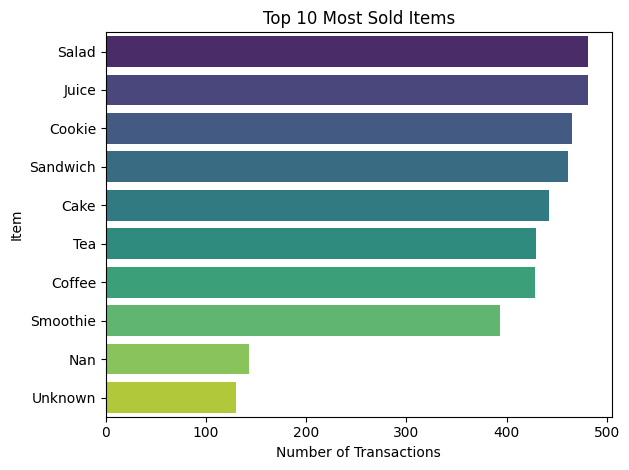

In [62]:
plt.Figure(figsize=(10,6))
top_items = df['Item'].value_counts().head(10)
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis', legend=False)
plt.title('Top 10 Most Sold Items')
plt.xlabel('Number of Transactions')
plt.ylabel('Item')
plt.tight_layout()
plt.show()

### 2. ` Total Revenue by Month`

* **Visualization**: Line plot of total revenue per month
* **Insight**: Understand seasonal trends in revenue

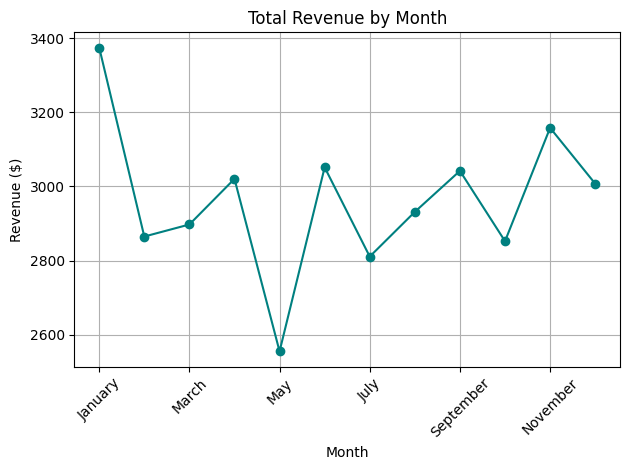

In [63]:
monthly_revenue = df.groupby('Transaction Month')['Total_Corrected'].sum().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

plt.Figure(figsize=(12,6))
monthly_revenue.plot(kind='line', marker='o', color = 'teal')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. ` Spending Behavior by Payment Method`

* **Visualization**: Box plot of total spent by payment method
* **Insight**: Compare average and spread of spending by payment type

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\108793444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Total_Corrected', data=df, palette='Set2')


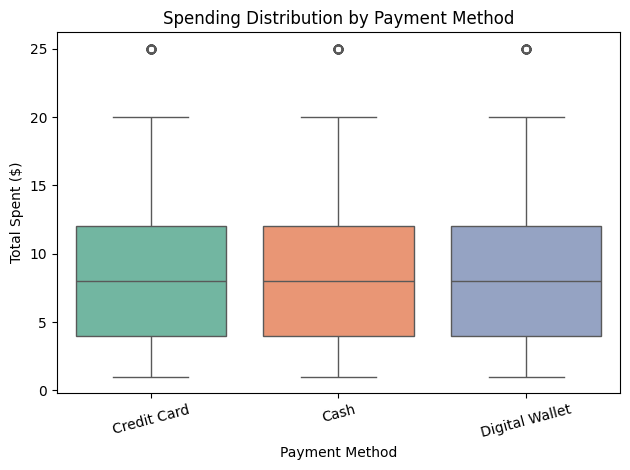

In [64]:
plt.Figure(figsize=(10,6))
sns.boxplot(x='Payment Method', y='Total_Corrected', data=df, palette='Set2')
plt.title('Spending Distribution by Payment Method')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 4. ` Transaction Count by Day of the Week`

* **Visualization**: Count plot for each weekday
* **Insight**: Discover which days are busiest for the business

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\1519947628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Transaction Weekday', order=order, palette='coolwarm')


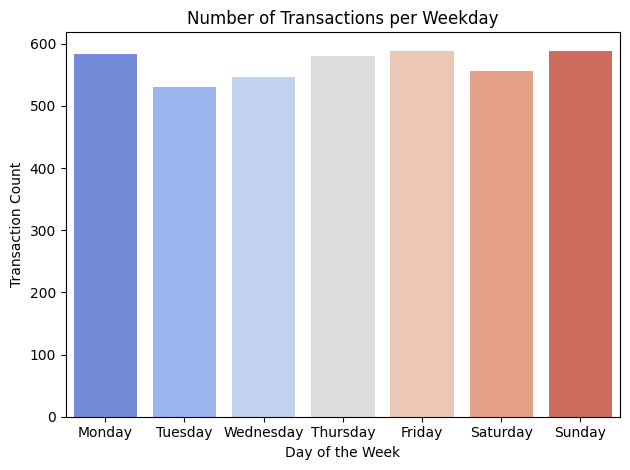

In [65]:
plt.Figure(figsize=(10,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Transaction Weekday', order=order, palette='coolwarm')
plt.title('Number of Transactions per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

### 5. ` Heatmap of Average Spending by Location and Weekday`

* **Visualization**: Heatmap
* **Insight**: Explore spatial-temporal spending patterns

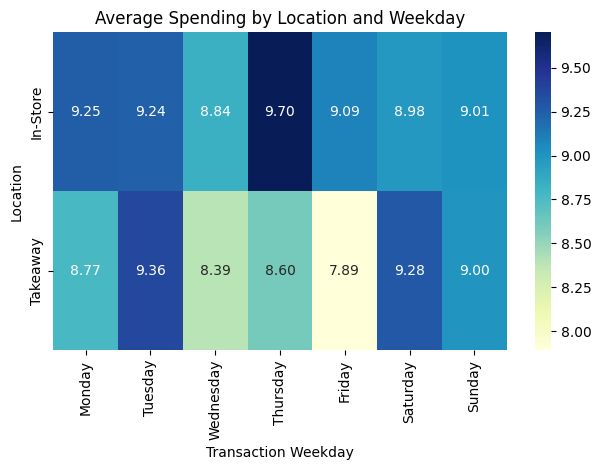

In [66]:
pivot_table = df.pivot_table(
    values='Total_Corrected',
    index='Location',
    columns='Transaction Weekday',
    aggfunc='mean'
).reindex(columns=order)

plt.Figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Average Spending by Location and Weekday')
plt.tight_layout()
plt.show()

## Encode Categorical Variables

**Data Encoding** is the process of converting categorical or textual data into numerical format, so that it can be used as input for algorithms to process. 
The reason for encoding is that most machine learning algorithms work with numbers and not with text or categorical variables.

**Categorical data** refers to variables that take on a limited set of values or categories, often representing labels, names, or types.

**Types of categorical data**
- Nominal Data:- Without any order or ranking
- Ordinal Data:- With a defined order or ranking

#### Techniques:
- Label Encoding:- For Nominal Data. Assigns a unique integer to each category.
- One Hot encoding:- For nominal Data. Converts data into a binary format.
- Ordinal enoding:- For ordinal data. Whose categories have a natural order. Converts into numerical values.
- Target encoding:- Each category in a feature is replaced by the mean of the target variable.
- Frequency:- Assigns each category a value based on its frequency in the dataset


## What to consider

**Data types (Nominal vs Ordinal)**

**Cardinality of features**

**Potential target leakage**

**Model readiness and performance**

---

## **Goal**:

Apply the most appropriate encoding strategy per feature for optimal downstream model performance, with **clear documentation** of the rationale behind each step.

---

## Step-by-Step Plan

### Step 1: Identify Categorical Features

Here’s a recap of the categorical columns from your data:

| Column                | Description         | Type    | Encoding Type                             |
| --------------------- | ------------------- | ------- | ----------------------------------------- |
| `Item`                | Product sold        | Nominal | **Frequency Encoding** (high cardinality) |
| `Payment Method`      | Mode of payment     | Nominal | **One-Hot Encoding** (low cardinality)    |
| `Location`            | Purchase location   | Nominal | **One-Hot Encoding**                      |
| `Transaction Month`   | Month of purchase   | Ordinal | **Ordinal Encoding**                      |
| `Transaction Weekday` | Weekday of purchase | Ordinal | **Ordinal Encoding**                      |
| `Item_Category`       | Broad item category | Nominal | **Target Encoding**                       |
| `Price_Category`      | Price class         | Ordinal | **Ordinal Encoding**                      |

---



## Step 2: Apply Encodings

### 2.1 Ordinal Encoding


In [67]:
# Define custom orderings
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_order = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply encoding
df['Transaction_Month_Ordinal'] = df['Transaction Month'].apply(lambda x: month_order.index(x))
df['Transaction_Weekday_Ordinal'] = df['Transaction Weekday'].apply(lambda x: weekday_order.index(x))
df['Price_Category_Ordinal'] = df['Price_Category'].map(price_order)


### 2.2 One-Hot Encoding (for low-cardinality nominal variables)

In [68]:
df = pd.get_dummies(df, columns=['Payment Method', 'Location'], prefix=['PayMethod', 'Loc'], drop_first=True)


###  2.3 Frequency Encoding (for high-cardinality nominal features like Item)

In [69]:
item_freq = df['Item'].value_counts() / len(df)
df['Item_Frequency_Encoded'] = df['Item'].map(item_freq)


### 2.4 Target Encoding (if a target exists, say High_Spending)

In [70]:
# Avoid target leakage: only fit target encoder on training set in real ML pipelines
# item_cat_mean = df.groupby('Item_Category')['High_Spending'].mean()
# df['Item_Category_Target_Encoded'] = df['Item_Category'].map(item_cat_mean)


In [71]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Transaction Date,Transaction Month,Transaction Weekday,Total_Corrected,Is_Total_Mismatch,...,Item_Category,Items_Per_Transaction,Price_Category,Transaction_Month_Ordinal,Transaction_Weekday_Ordinal,Price_Category_Ordinal,PayMethod_Credit Card,PayMethod_Digital Wallet,Loc_Takeaway,Item_Frequency_Encoded
0,TXN_1961373,Coffee,2.0,2.0,4.0,2023-09-08,September,Friday,4.0,False,...,Coffee,2.0,Medium,8,4,1,True,False,True,0.107673
1,TXN_4977031,Cake,4.0,3.0,12.0,2023-05-16,May,Tuesday,12.0,False,...,Pastry,4.0,Medium,4,1,1,False,False,False,0.111195
2,TXN_4271903,Cookie,4.0,1.0,4.0,2023-07-19,July,Wednesday,4.0,False,...,Pastry,4.0,Low,6,2,0,True,False,False,0.116981
3,TXN_3160411,Coffee,2.0,2.0,4.0,2023-06-11,June,Sunday,4.0,False,...,Coffee,2.0,Medium,5,6,1,False,True,False,0.107673
4,TXN_2548360,Salad,5.0,5.0,25.0,2023-11-07,November,Tuesday,25.0,False,...,Salad,5.0,High,10,1,2,False,False,True,0.121006


### 2.5 Drop Original Columns

In [72]:
df_encoded = df.drop(columns=[
    'Transaction Month',
    'Transaction Weekday',
    'Price_Category',
    'Item'
])

In [73]:
df_encoded.head()

,Transaction ID,Quantity,Price Per Unit,Total Spent,Transaction Date,Total_Corrected,Is_Total_Mismatch,High_Spending,Item_Category,Items_Per_Transaction,Transaction_Month_Ordinal,Transaction_Weekday_Ordinal,Price_Category_Ordinal,PayMethod_Credit Card,PayMethod_Digital Wallet,Loc_Takeaway,Item_Frequency_Encoded
0,TXN_1961373,2.0,2.0,4.0,2023-09-08,4.0,False,False,Coffee,2.0,8,4,1,True,False,True,0.107673
1,TXN_4977031,4.0,3.0,12.0,2023-05-16,12.0,False,False,Pastry,4.0,4,1,1,False,False,False,0.111195
2,TXN_4271903,4.0,1.0,4.0,2023-07-19,4.0,False,False,Pastry,4.0,6,2,0,True,False,False,0.116981
3,TXN_3160411,2.0,2.0,4.0,2023-06-11,4.0,False,False,Coffee,2.0,5,6,1,False,True,False,0.107673
4,TXN_2548360,5.0,5.0,25.0,2023-11-07,25.0,False,True,Salad,5.0,10,1,2,False,False,True,0.121006


## **Feature Correlation Analysis**

### 1. Compute the Correlation Matrix

We'll use .corr() to calculate Pearson correlations for all numeric features.

In [74]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr(numeric_only=True)
correlation_matrix

,Quantity,Price Per Unit,Total Spent,Total_Corrected,Is_Total_Mismatch,High_Spending,Items_Per_Transaction,Transaction_Month_Ordinal,Transaction_Weekday_Ordinal,Price_Category_Ordinal,PayMethod_Credit Card,PayMethod_Digital Wallet,Loc_Takeaway,Item_Frequency_Encoded
Quantity,1.000000,0.009686,0.698962,0.700259,-0.001760,0.242208,1.000000,-0.011705,0.002168,0.003674,-0.013011,0.001460,-0.011619,0.005228
Price Per Unit,0.009686,1.000000,0.651121,0.652151,-0.002980,0.276710,0.009686,-0.019876,-0.007748,0.888177,-0.007188,-0.010417,-0.033831,0.050741
Total Spent,0.698962,0.651121,1.000000,0.998489,-0.018046,0.462831,0.698962,-0.014292,-0.006094,0.573705,-0.013507,0.000372,-0.035966,0.039411
Total_Corrected,0.700259,0.652151,0.998489,1.000000,-0.003354,0.462339,0.700259,-0.014807,-0.006541,0.574485,-0.012782,-0.000768,-0.035759,0.039769
Is_Total_Mismatch,-0.001760,-0.002980,-0.018046,-0.003354,1.000000,-0.013573,-0.001760,-0.011726,-0.017244,-0.001353,-0.005552,-0.002265,-0.000216,0.022379
High_Spending,0.242208,0.276710,0.462831,0.462339,-0.013573,1.000000,0.242208,-0.009985,0.016870,0.319917,0.018975,-0.020694,-0.010901,0.069406
Items_Per_Transaction,1.000000,0.009686,0.698962,0.700259,-0.001760,0.242208,1.000000,-0.011705,0.002168,0.003674,-0.013011,0.001460,-0.011619,0.005228
Transaction_Month_Ordinal,-0.011705,-0.019876,-0.014292,-0.014807,-0.011726,-0.009985,-0.011705,1.000000,0.021018,-0.007041,-0.015247,0.037844,-0.002436,-0.001148
Transaction_Weekday_Ordinal,0.002168,-0.007748,-0.006094,-0.006541,-0.017244,0.016870,0.002168,0.021018,1.000000,-0.008550,-0.013573,0.012317,0.027520,-0.017186
Price_Category_Ordinal,0.003674,0.888177,0.573705,0.574485,-0.001353,0.319917,0.003674,-0.007041,-0.008550,1.000000,-0.008066,-0.017454,-0.021456,0.071135


### 2. Visualize the Correlation Matrix (Heatmap)

A heatmap will help us quickly identify strong positive or negative correlations.

In [75]:
# plt.Figure(figsize=(24,20))
# sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=False, linewidths=0.5, annot_kws={"size": 10})
# plt.title("Feature correlation Heatmap", fontsize=18)
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

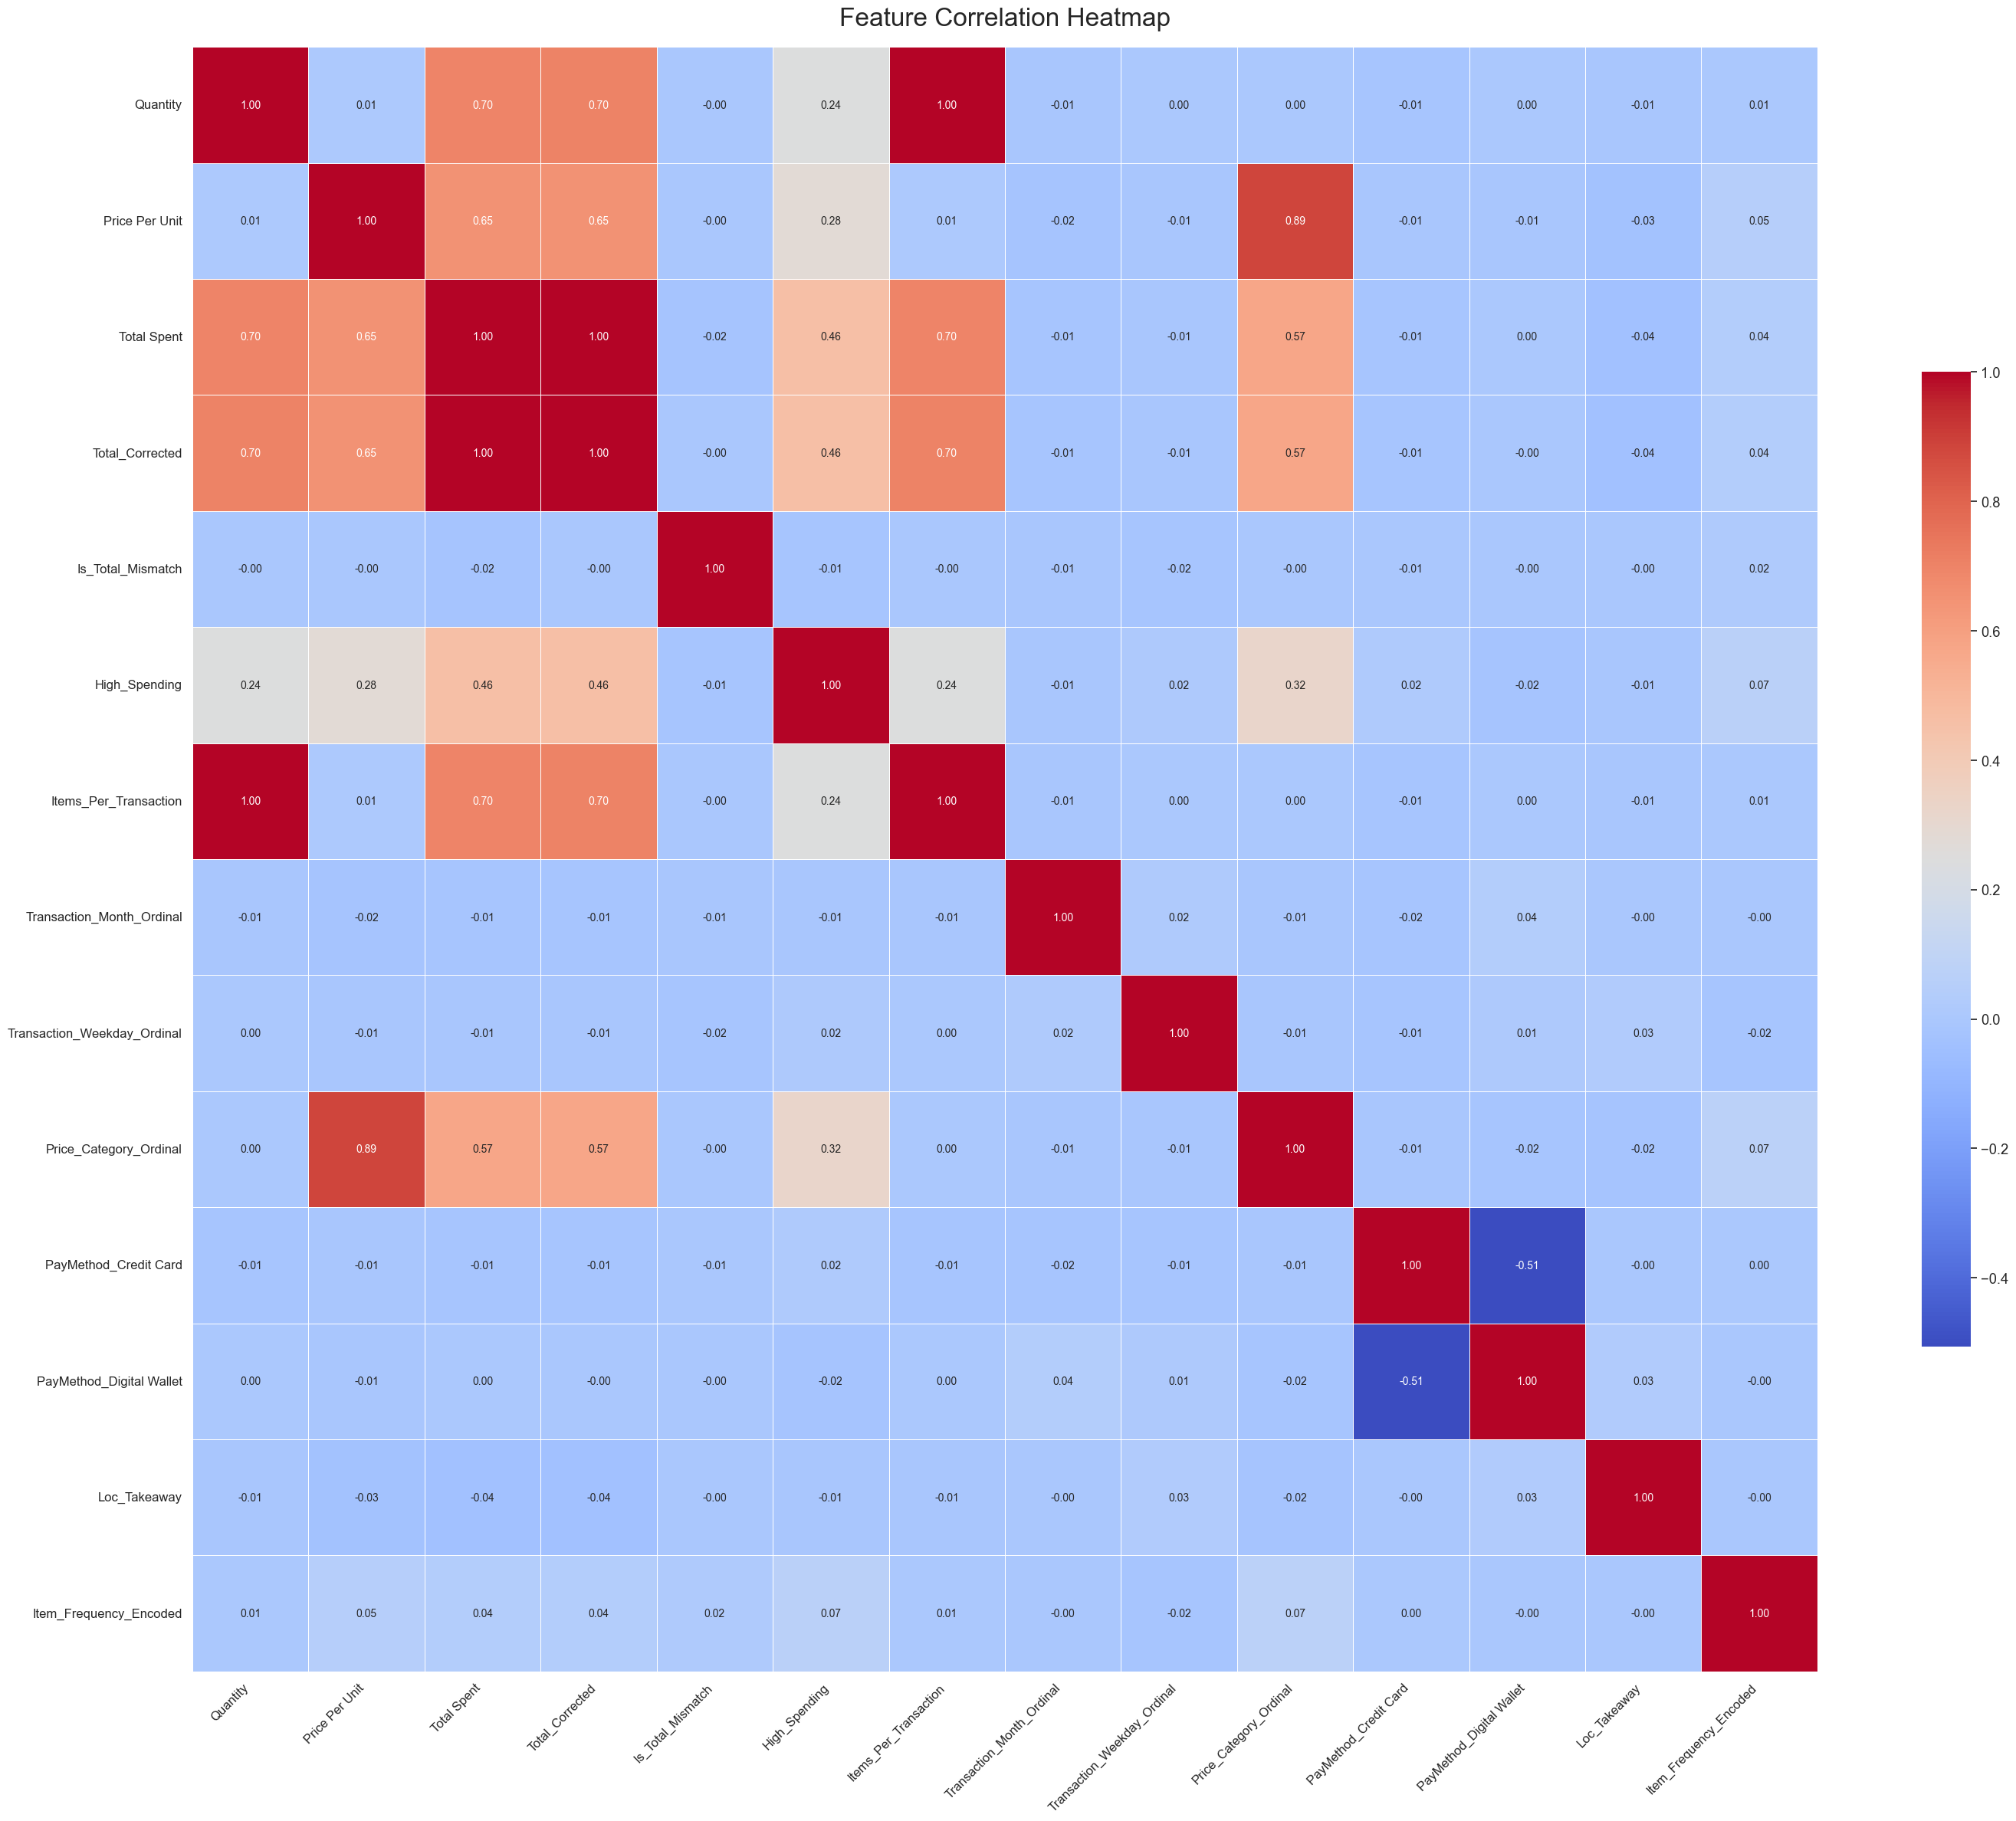

In [76]:
# Set high-resolution display
plt.figure(figsize=(30, 24))  # Much larger figure to avoid overlap
sns.set(font_scale=1.2)       # Increase font scale for readability

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.6},      # Shrink colorbar to save space
    annot_kws={"size": 10}         # Slightly bigger annotation text
)

plt.title("Feature Correlation Heatmap", fontsize=24, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


In [77]:
df_encoded.to_csv("encoded_dataset.csv", index=False)

#### 🔍 **Sales Trend Analysis by Item**

We want to **predict `Total Spent`** as a **regression problem** based on features like item, quantity, price per unit, time, and location. 

This gives insights into **which factors drive higher spending**,  a key sales trend metric.

---


### ✅ **Train-Test Split for Regression Task: Predicting `Total Spent`**

We'll:

* Use the encoded dataset.
* Set `Total Spent` as the target variable.
* Drop ID/date columns and other potential leakage columns like `Total_Corrected`.
* Split into training and testing sets (80–20).

---


### Train-Test Split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load the encoded dataset
df = pd.read_csv("encoded_dataset.csv")


In [79]:
# Separate features and target
X = df.drop('Total Spent', axis=1)
y = df['Total Spent']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Ensure all data is numeric
X_encoded = X_encoded.astype(float)


In [80]:
# Define the target variable and feature
# Target: 'Total Spent' (Regression task)
# Drop idenifier columns and potential leakage features
# X = df.drop(columns=["Transaction ID","Transaction Date", "Total Spent", "Total_Corrected"])
# y = df["Total Spent"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [81]:
# Display the result
print("Train-test split completed.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Train-test split completed.
X_train shape: (3180, 4356)
X_test shape: (795, 4356)
y_train shape: (3180,)
y_test: (795,)


## Data Modelling

## **Objective**

I am building a **regression pipeline** to predict `Total Spent` using multiple models and comparing their performance using standard evaluation metrics.

---

### Let's Train and Compare the Following Regressors:

| Model                                | Description                                              |
| ------------------------------------ | -------------------------------------------------------- |
| **Linear Regression**                | Baseline model; good for interpretable trends.           |
| **Ridge Regression**                 | Linear with L2 regularization.                           |
| **Lasso Regression**                 | Linear with L1 regularization (feature selection).       |
| **Decision Tree Regressor**          | Captures nonlinear relationships.                        |
| **Random Forest Regressor**          | Robust ensemble method; handles nonlinearities well.     |
| **Gradient Boosting Regressor**      | Strong performance on structured data.                   |
| **Support Vector Regressor (SVR)**   | Effective in high-dimensional spaces (may need scaling). |
| **XGBoost Regressor** (if available) | Powerful gradient boosting library.                      |


In [82]:
# Import require libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor


### Explanation:

* `LinearRegression`, `Ridge`, `Lasso`: Different types of **linear regression** models (with and without regularization).
* `DecisionTreeRegressor`: A model that learns splits in data hierarchically (nonlinear).
* `RandomForestRegressor`, `GradientBoostingRegressor`: **Ensemble methods** that combine multiple decision trees.
* `SVR`: **Support Vector Regressor** — uses kernels for capturing complex patterns.
* `metrics`: Evaluate model performance using RMSE, MAE, and R².
* `numpy`: Used here for square root (`np.sqrt`) in RMSE calculation.

---


In [83]:
# Define all the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100,random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

### Explanation:

* The dictionary `models` maps **model names** to their **scikit-learn implementations**.
* **Parameters**:

  * `alpha`: Regularization strength for Ridge/Lasso.
  * `n_estimators`: Number of trees in ensemble models.
  * `random_state`: Ensures reproducibility.
  * `kernel='rbf'`, `C`, `epsilon`: Hyperparameters for SVR.
* `XGBoost` is a model I am using for Regression

---


In [84]:
# Evaluate all the models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": round(rmse, 3),
        "MAE": round(mae, 3),
        "R²": round(r2, 3)
    })

### Explanation:

* **Loop through each model**:

  1. Train it using `X_train`, `y_train`.
  2. Predict on `X_test`.
  3. Evaluate using:

     * **RMSE (Root Mean Squared Error)**: Penalizes larger errors.
     * **MAE (Mean Absolute Error)**: Measures average absolute error.
     * **R² (R-squared)**: Proportion of variance explained by the model.
  4. Results are rounded and stored in a list of dictionaries.

---


In [85]:
# Display the results
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print("📊 Model Performance Summary:")
print(results_df)

📊 Model Performance Summary:
               Model   RMSE    MAE     R²
3      Decision Tree  0.177  0.006  0.999
7            XGBoost  0.205  0.007  0.999
5  Gradient Boosting  0.203  0.012  0.999
4      Random Forest  0.182  0.010  0.999
2   Lasso Regression  0.342  0.046  0.997
1   Ridge Regression  0.335  0.052  0.997
0  Linear Regression  0.338  0.054  0.997
6                SVR  0.353  0.086  0.997


### Explanation:

* Converts the list of results into a **DataFrame**.
* **Sorts models by R² score** (from best to worst).
* Prints the final performance summary table.

---

### **Outcome:**

A **ranked table** comparing all my regression models based on their:

* **Predictive accuracy (RMSE, MAE)**
* **Explained variance (R²)**

---
### Key Metrics: 

* **RMSE**: Penalizes large errors. Lower = better. 

* **MAE**: Average absolute error. 

* **R²**: Proportion of variance explained (closer to 1 = better).



# 📊 **Visualization of Model Performance**

This block creates a bar plot comparing all models based on R² Score, RMSE, and MAE:

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\2425743226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")


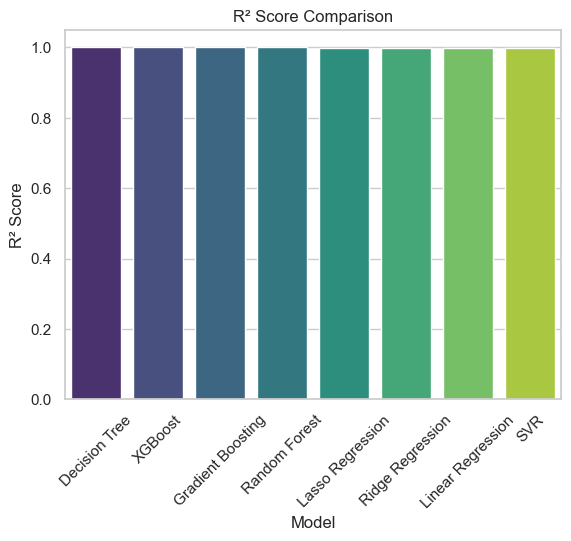

In [86]:
# Set the visual theme
sns.set(style="whitegrid")

# Plot R² Score
plt.Figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="R²", palette="viridis")
plt.title("R² Score Comparison")
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.show()

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\4058346460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="magma")


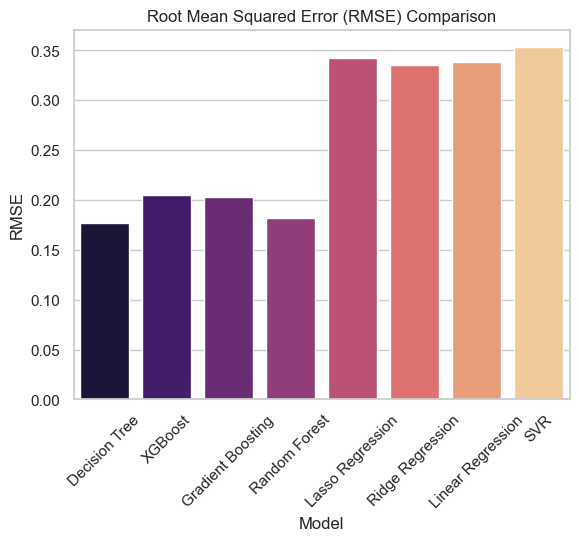

In [87]:
# Plot RMSE
plt.Figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="magma")
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.xticks(rotation=45)
plt.ylabel("RMSE")
plt.show()

C:\Users\IDA\AppData\Local\Temp\ipykernel_27008\2907112733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="MAE", palette="coolwarm")


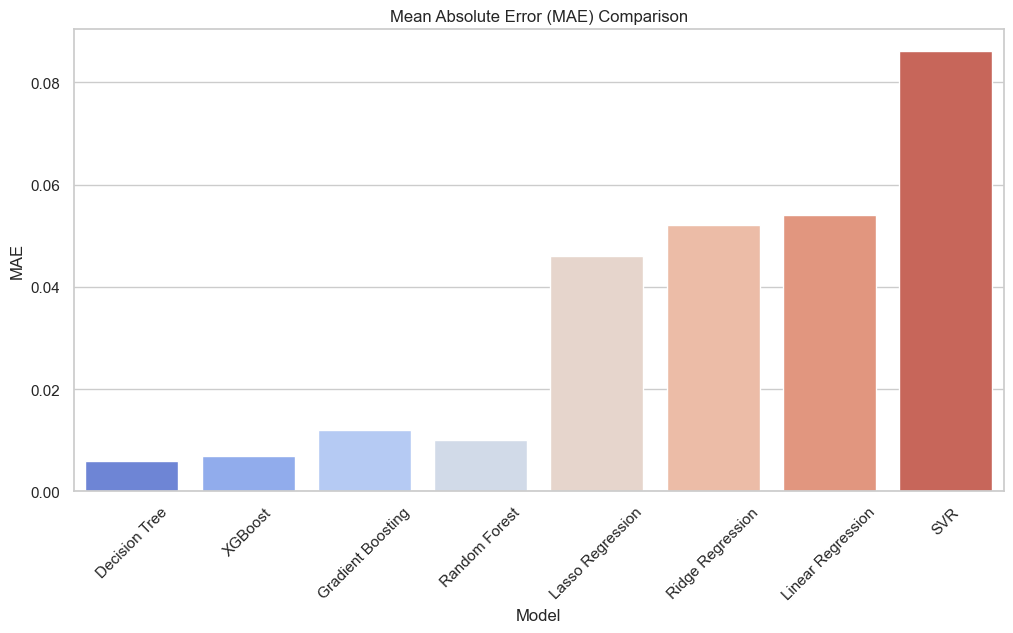

In [88]:
# Plot MAE
plt.figure(figsize=(12,6))
sns.barplot(data=results_df, x="Model", y="MAE", palette="coolwarm")
plt.title("Mean Absolute Error (MAE) Comparison")
plt.xticks(rotation=45)
plt.ylabel("MAE")
plt.show()

**B. Hyperparameter Tuning with GridSearchCV (for Random Forest)**

In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set Up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=1, scoring='r2', verbose=1)


# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", round(grid_search.best_score_, 3))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best R2 Score: 0.999


📈 2. **Support Vector Regressor (SVR)**

In [90]:
from sklearn.svm import SVR

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svr = SVR()
grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, 
                        cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train, y_train)

print("SVR Best Params:", grid_svr.best_params_)
print("SVR Best R²:", round(grid_svr.best_score_, 3))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
SVR Best Params: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
SVR Best R²: 0.997


🧮 3. **Ridge Regression**

In [92]:
from sklearn.linear_model import Ridge

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge()
grid_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge,
                          cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_ridge.fit(X_train, y_train)

print("Ridge Best Params:", grid_ridge.best_params_)
print("Ridge Best R²:", round(grid_ridge.best_score_, 3))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


MemoryError: Unable to allocate 64.3 MiB for an array with shape (3974, 2120) and data type float64

✂️ 4. **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10]
}

lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso,
                          cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_lasso.fit(X_train, y_train)

print("Lasso Best Params:", grid_lasso.best_params_)
print("Lasso Best R²:", round(grid_lasso.best_score_, 3))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Lasso Best Params: {'alpha': 0.01}
Lasso Best R²: 0.997


### **Visualize Predictions**

Here we compare predicted vs actual values for the test set.

In [ ]:
#  Using best model from GridSearchCV
from sklearn.metrics import r2_score
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# R² Score
print("Test R² Score:", round(r2_score(y_test, y_pred), 3))

Test R² Score: 0.999


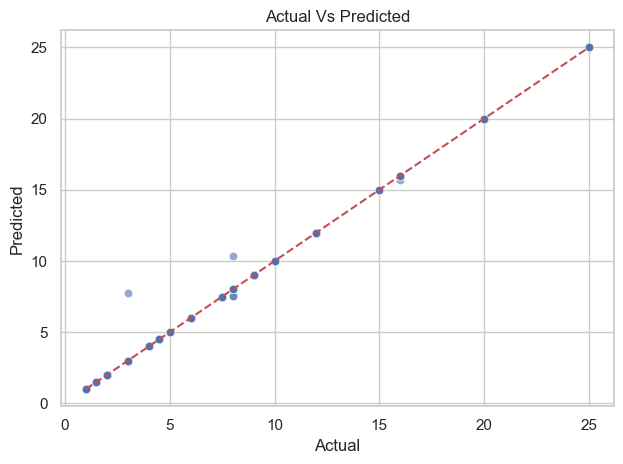

In [ ]:
# Plot
plt.Figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

### **Feature Importance Analysis**

For Tree-Based Models (e.g., Random Forest)

In [ ]:
# Feature Importance
importances = best_model.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)


C:\Users\IDA\AppData\Local\Temp\ipykernel_216\1864709005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_df.head(20), x='Importance', y='Feature', palette='viridis')


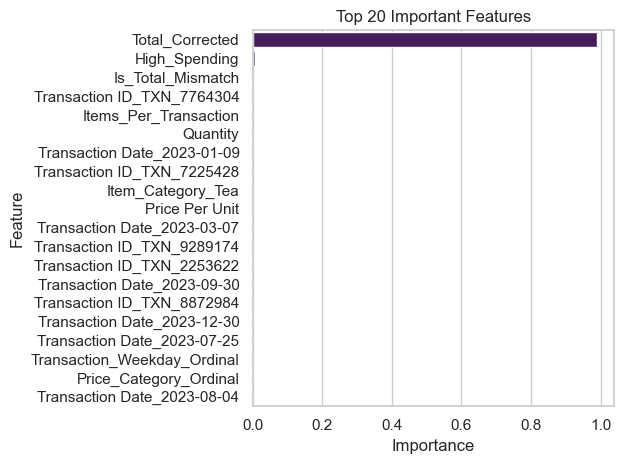

In [ ]:
# Plot
plt.Figure(figsize=(10,6))
sns.barplot(data=feature_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()


### **For Linear Models (e.g., Ridge, Lasso)**

In [ ]:
from sklearn.linear_model import Ridge, Lasso
best_model_li = grid_ridge.best_estimator_

coefficients = best_model_li.coef_
features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['AbsCoef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoef', ascending=False)


C:\Users\IDA\AppData\Local\Temp\ipykernel_216\2405975391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')


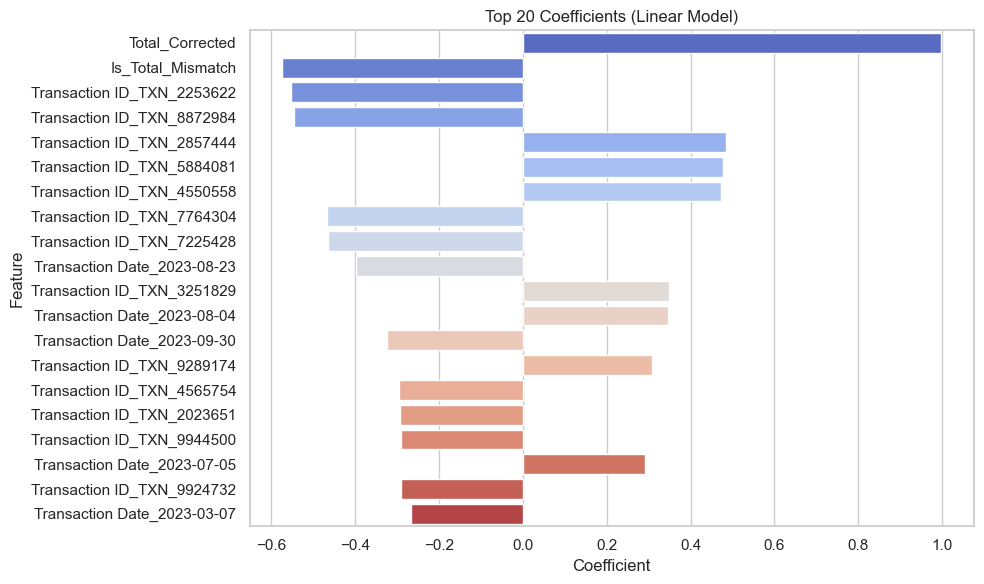

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=coef_df.head(20), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 20 Coefficients (Linear Model)")
plt.tight_layout()
plt.show()

## **Save & Pickle Models**

In [ ]:
import joblib

import pickle

# After training your model
# model = your trained regressor

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model Saved to best_model.pkl")


Model Saved to best_model.pkl
